In [40]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'Colab Notebooks/mineracaoDados/'

Mounted at /content/gdrive


In [0]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

In [0]:
data_sd = pd.read_csv(base_dir + 'seeds_dataset.txt', sep='\t' , lineterminator='\n')
X = data_sd.drop('Class', axis=1)


In [117]:
X

,Area,Perimeter,Compactness,Length_of_kernel,Width_of_kernel,Asymmetry_coefficient,Length_of_kernel_groove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044


In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
#normalized_X = preprocessing.normalize(X, norm='max')
normalized_X = scaler.transform(X)
normalized_X

array([[0.44098206, 0.50206612, 0.5707804 , ..., 0.48610121, 0.18930164,
        0.34515017],
       [0.40509915, 0.44628099, 0.66243194, ..., 0.50106914, 0.03288302,
        0.21516494],
       [0.34938621, 0.34710744, 0.87931034, ..., 0.50392017, 0.25145302,
        0.1506647 ],
       ...,
       [0.24645892, 0.25826446, 0.7277677 , ..., 0.42908054, 0.98166664,
        0.26440177],
       [0.11803588, 0.16528926, 0.39927405, ..., 0.14682823, 0.36834441,
        0.25849335],
       [0.16147309, 0.19214876, 0.54718693, ..., 0.24518888, 0.63346292,
        0.26784835]])

In [205]:
normalized_X

array([[0.44098206, 0.50206612, 0.5707804 , ..., 0.48610121, 0.18930164,
        0.34515017],
       [0.40509915, 0.44628099, 0.66243194, ..., 0.50106914, 0.03288302,
        0.21516494],
       [0.34938621, 0.34710744, 0.87931034, ..., 0.50392017, 0.25145302,
        0.1506647 ],
       ...,
       [0.24645892, 0.25826446, 0.7277677 , ..., 0.42908054, 0.98166664,
        0.26440177],
       [0.11803588, 0.16528926, 0.39927405, ..., 0.14682823, 0.36834441,
        0.25849335],
       [0.16147309, 0.19214876, 0.54718693, ..., 0.24518888, 0.63346292,
        0.26784835]])

In [0]:
from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist

In [45]:
pdist(normalized_X, 'euclidean')

array([0.26121864, 0.49013169, 0.45512856, ..., 0.76817322, 0.44642209,
       0.32558041])

In [0]:
matriz_dissimilaridade =squareform(pdist(normalized_X, 'euclidean'))

In [8]:
matriz_dissimilaridade

array([[0.        , 0.26121864, 0.49013169, ..., 0.92064579, 0.71513207,
        0.72232394],
       [0.26121864, 0.        , 0.36584992, ..., 1.00231883, 0.7183676 ,
        0.77254719],
       [0.49013169, 0.36584992, 0.        , ..., 0.77081798, 0.68853979,
        0.63005191],
       ...,
       [0.92064579, 1.00231883, 0.77081798, ..., 0.        , 0.76817322,
        0.44642209],
       [0.71513207, 0.7183676 , 0.68853979, ..., 0.76817322, 0.        ,
        0.32558041],
       [0.72232394, 0.77254719, 0.63005191, ..., 0.44642209, 0.32558041,
        0.        ]])

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

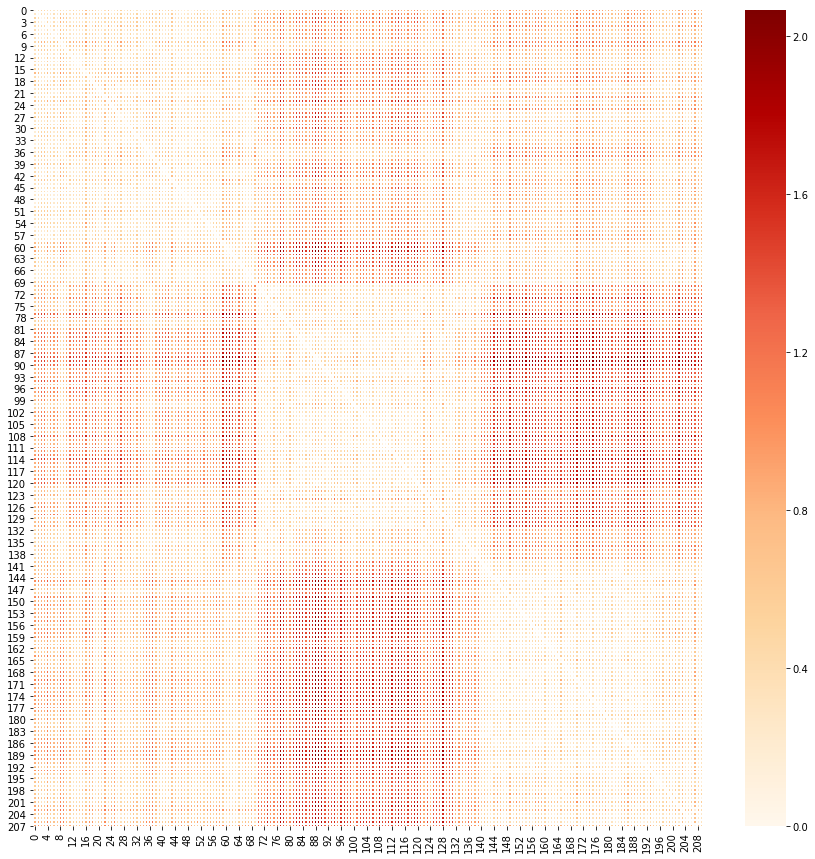

In [12]:
plt.figure(figsize=(15,15))
sns.heatmap(
    matriz_dissimilaridade,
    cmap='OrRd',
    linewidth=1
)

In [0]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [0]:
neigh = NearestNeighbors(n_neighbors=3, metric='euclidean')
nbrs = neigh.fit(normalized_X)

In [0]:
distances, indices = nbrs.kneighbors(normalized_X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]

In [216]:
normalized_X

array([[0.44098206, 0.50206612, 0.5707804 , ..., 0.48610121, 0.18930164,
        0.34515017],
       [0.40509915, 0.44628099, 0.66243194, ..., 0.50106914, 0.03288302,
        0.21516494],
       [0.34938621, 0.34710744, 0.87931034, ..., 0.50392017, 0.25145302,
        0.1506647 ],
       ...,
       [0.24645892, 0.25826446, 0.7277677 , ..., 0.42908054, 0.98166664,
        0.26440177],
       [0.11803588, 0.16528926, 0.39927405, ..., 0.14682823, 0.36834441,
        0.25849335],
       [0.16147309, 0.19214876, 0.54718693, ..., 0.24518888, 0.63346292,
        0.26784835]])

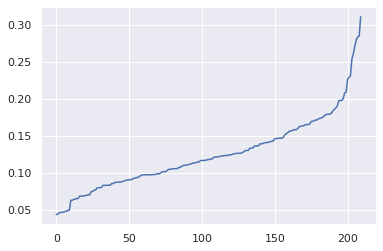

In [63]:

plt.plot(distances)

In [0]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [0]:
db = DBSCAN(eps=0.21, min_samples=5, metric='euclidean').fit(normalized_X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [16]:
labels

array([ 0,  0,  0,  0, -1,  0,  0,  0, -1, -1, -1,  0,  0,  0,  0, -1, -1,
       -1, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0, -1, -1, -1,  0, -1,  0,  0,  1, -1,  0,  0,  0,  0,  0,  0,  0,
       -1, -1,  0,  0,  0,  0, -1,  0, -1, -1, -1,  1,  0, -1,  1,  0,  0,
        0,  0,  2,  2,  2,  3,  2,  2,  2, -1, -1, -1, -1,  3, -1,  3,  3,
        3,  3, -1, -1, -1, -1,  3,  3, -1, -1,  2,  3, -1, -1,  3, -1,  3,
        3,  3,  3,  3,  3,  2, -1,  3,  3,  3,  3, -1, -1,  3,  3,  3,  3,
        3, -1,  2,  2,  3, -1,  3,  2,  3, -1, -1,  3,  3,  2,  2, -1, -1,
        2, -1, -1,  2,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,
        0, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  1,  0,  1,  0, -1,
        0,  0,  0, -1,  0,  0])

In [59]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(normalized_X, labels))

Estimated number of clusters: 3
Estimated number of noise points: 28
Silhouette Coefficient: 0.104


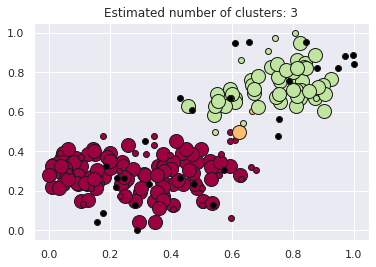

In [60]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)
    #print(class_member_mask)
    xy = normalized_X[class_member_mask & core_samples_mask]
    #print(xy)
    #print(xy[:, 0])
    plt.plot(xy[:, 4], xy[:, 6], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = normalized_X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 4], xy[:, 6], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()